# ***1. Data Handling & Exploration***

* Perform an initial Exploratory Data Analysis (EDA) to understand the structure, patterns, and quality of the data.
* Identify and address missing values, duplicates, and inconsistencies.
* Apply appropriate data cleaning and wrangling techniques to prepare the dataset for analysis

In [1]:
%pip install -U kaleido

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/Assessment Data - data.csv')

# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print()

# Display column names and data types
print("=== COLUMN INFORMATION ===")
print(df.dtypes)
print()

# Display first few rows
print("=== FIRST 5 ROWS ===")
print(df.head())

=== DATASET OVERVIEW ===
Dataset shape: (59317, 14)
Number of rows: 59,317
Number of columns: 14

=== COLUMN INFORMATION ===
login            int64
ticket           int64
symbol          object
type            object
open_time       object
close_time      object
open_price     float64
close_price    float64
stop loss      float64
take profit    float64
pips           float64
reason           int64
volume           int64
profit         float64
dtype: object

=== FIRST 5 ROWS ===
      login    ticket  symbol  type            open_time           close_time  \
0  11173702  47345780  XAUUSD   Buy  2024.07.30 11:05:29   2024-07-31 7:58:09   
1  11173702  47718163  XAUUSD   Buy  2024.07.31 09:46:04  2024-07-31 21:42:15   
2  11173702  50360070  XAUUSD  Sell  2024.08.13 13:03:27  2024-08-14 15:24:08   
3  11173702  51120570  XAUUSD   Buy  2024.08.19 13:27:40  2024-08-19 16:37:12   
4  11173702  52180073  XAUUSD  Sell  2024.08.28 02:30:32  2024-08-28 15:29:39   

   open_price  close_price  st

In [33]:
# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_info)
print()

# Check for duplicates
print("=== DUPLICATE ANALYSIS ===")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {duplicate_count/len(df)*100:.2f}%")
print()

# Unique values in categorical columns
print("=== UNIQUE VALUES IN CATEGORICAL COLUMNS ===")
categorical_cols = ['symbol', 'type']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Values: {df[col].value_counts().head()}")
    print()

# Check unique logins
print(f"Number of unique logins: {df['login'].nunique()}")
print(f"Number of unique tickets: {df['ticket'].nunique()}")
print()

# Reason codes
print("=== REASON CODES ===")
print(df['reason'].value_counts().sort_index())

=== MISSING VALUES ANALYSIS ===
             Missing Count  Missing Percentage
login                    0                 0.0
ticket                   0                 0.0
symbol                   0                 0.0
type                     0                 0.0
open_time                0                 0.0
close_time               0                 0.0
open_price               0                 0.0
close_price              0                 0.0
stop loss                0                 0.0
take profit              0                 0.0
pips                     0                 0.0
reason                   0                 0.0
volume                   0                 0.0
profit                   0                 0.0

=== DUPLICATE ANALYSIS ===
Number of duplicate rows: 0
Percentage of duplicates: 0.00%

=== UNIQUE VALUES IN CATEGORICAL COLUMNS ===
symbol: 63 unique values
Values: symbol
XAUUSD    28887
EURUSD     6196
US30       4313
GBPUSD     3133
NDX100     2577
Name: cou

In [4]:
# Descriptive statistics for numerical columns
print("=== DESCRIPTIVE STATISTICS ===")
print(df.describe())
print()

# Convert time columns to datetime for time-based analysis
print("=== TIME DATA CONVERSION ===")
try:
    # Try different datetime formats
    df['open_time_dt'] = pd.to_datetime(df['open_time'], format='%Y.%m.%d %H:%M:%S', errors='coerce')
    df['close_time_dt'] = pd.to_datetime(df['close_time'], errors='coerce')

    # Check conversion success
    print(f"Open time conversion success: {df['open_time_dt'].notna().sum()} / {len(df)}")
    print(f"Close time conversion success: {df['close_time_dt'].notna().sum()} / {len(df)}")

    # Calculate trade duration
    df['trade_duration'] = df['close_time_dt'] - df['open_time_dt']
    df['trade_duration_hours'] = df['trade_duration'].dt.total_seconds() / 3600

    print(f"Average trade duration: {df['trade_duration_hours'].mean():.2f} hours")
    print(f"Median trade duration: {df['trade_duration_hours'].median():.2f} hours")

except Exception as e:
    print(f"Error in datetime conversion: {e}")

print()

# Analyze profit/loss distribution
print("=== PROFIT/LOSS ANALYSIS ===")
profitable_trades = (df['profit'] > 0).sum()
losing_trades = (df['profit'] < 0).sum()
breakeven_trades = (df['profit'] == 0).sum()

print(f"Profitable trades: {profitable_trades} ({profitable_trades/len(df)*100:.1f}%)")
print(f"Losing trades: {losing_trades} ({losing_trades/len(df)*100:.1f}%)")
print(f"Breakeven trades: {breakeven_trades} ({breakeven_trades/len(df)*100:.1f}%)")
print()

print(f"Total profit: ${df['profit'].sum():.2f}")
print(f"Average profit per trade: ${df['profit'].mean():.2f}")
print(f"Maximum profit: ${df['profit'].max():.2f}")
print(f"Maximum loss: ${df['profit'].min():.2f}")

=== DESCRIPTIVE STATISTICS ===
              login        ticket     open_price    close_price  \
count  5.931700e+04  5.931700e+04   59317.000000   59317.000000   
mean   4.274373e+07  4.820009e+07    9247.848230    9249.311204   
std    2.126909e+08  2.781208e+07   20700.786785   20702.285285   
min    1.117370e+07  7.631230e+05       0.308400       0.325050   
25%    1.318703e+07  2.785692e+07      70.730000      70.940000   
50%    1.327834e+07  5.709664e+07    2645.190000    2645.790000   
75%    1.340079e+07  7.241683e+07    2755.480000    2755.220000   
max    2.145732e+09  8.051714e+07  109111.000000  108304.000000   

           stop loss   take profit          pips        reason         volume  \
count   59317.000000  5.931700e+04  5.931700e+04  59317.000000   59317.000000   
mean     6119.568535  4.895936e+03  1.115243e+02      7.236711     176.008463   
std     17961.190194  1.736828e+04  3.093160e+04      6.774457    1768.198799   
min         0.000000  0.000000e+00 -1.465

In [5]:
# Fix data quality issues found
print("=== DATA QUALITY ISSUES AND CLEANING ===")

# Issue 1: Inconsistent case in 'type' column
print("Original type values:")
print(df['type'].value_counts())
print()

# Standardize case
df['type'] = df['type'].str.capitalize()
print("After standardization:")
print(df['type'].value_counts())
print()

# Issue 2: Time data inconsistencies (negative durations suggest data quality issues)
print("=== TIME DATA ANALYSIS ===")
# Let's examine the time formats more closely
print("Sample open_time values:")
print(df['open_time'].head(10))
print()
print("Sample close_time values:")
print(df['close_time'].head(10))
print()

# Check for missing close times (these might be open positions)
missing_close_times = df['close_time_dt'].isna().sum()
print(f"Trades with missing close times (possibly open positions): {missing_close_times}")
print()

# Analyze trades with valid time data only
valid_time_mask = df['open_time_dt'].notna() & df['close_time_dt'].notna()
valid_trades = df[valid_time_mask].copy()
valid_trades['trade_duration_hours'] = (valid_trades['close_time_dt'] - valid_trades['open_time_dt']).dt.total_seconds() / 3600

print(f"Trades with valid time data: {len(valid_trades)} out of {len(df)}")
print(f"Average duration (valid trades): {valid_trades['trade_duration_hours'].mean():.2f} hours")
print(f"Median duration (valid trades): {valid_trades['trade_duration_hours'].median():.2f} hours")

=== DATA QUALITY ISSUES AND CLEANING ===
Original type values:
type
Buy     25647
Sell    21577
buy      7069
sell     5024
Name: count, dtype: int64

After standardization:
type
Buy     32716
Sell    26601
Name: count, dtype: int64

=== TIME DATA ANALYSIS ===
Sample open_time values:
0    2024.07.30 11:05:29
1    2024.07.31 09:46:04
2    2024.08.13 13:03:27
3    2024.08.19 13:27:40
4    2024.08.28 02:30:32
5    2024.08.29 11:21:25
6    2024.09.02 12:29:41
7    2024.09.03 13:33:39
8    2024.09.09 18:09:18
9    2024.09.23 18:34:08
Name: open_time, dtype: object

Sample close_time values:
0     2024-07-31 7:58:09
1    2024-07-31 21:42:15
2    2024-08-14 15:24:08
3    2024-08-19 16:37:12
4    2024-08-28 15:29:39
5    2024-08-29 12:53:08
6     2024-09-03 4:13:46
7    2024-09-03 17:19:02
8     2024-09-11 9:40:01
9    2024-09-24 17:53:18
Name: close_time, dtype: object

Trades with missing close times (possibly open positions): 12149

Trades with valid time data: 47168 out of 59317
Average d

In [11]:
# Create visualizations for EDA
# Since we can't use matplotlib directly, let's prepare data for chart creation

# 1. Symbol distribution data
symbol_counts = df['symbol'].value_counts().head(10)
print("=== TOP 10 TRADING SYMBOLS ===")
print(symbol_counts)
print()

# 2. Profit distribution by symbol (top 10 symbols)
top_symbols = symbol_counts.index.tolist()
symbol_profits = df[df['symbol'].isin(top_symbols)].groupby('symbol')['profit'].agg(['sum', 'mean', 'count']).round(2)
print("=== PROFIT ANALYSIS BY TOP SYMBOLS ===")
print(symbol_profits)
print()

# 3. Trading patterns by hour
if 'open_time_dt' in df.columns:
    df['hour'] = df['open_time_dt'].dt.hour
    hourly_trades = df['hour'].value_counts().sort_index()
    print("=== TRADING ACTIVITY BY HOUR ===")
    print(hourly_trades.head(10))
print()

# 4. Reason codes analysis
reason_profit = df.groupby('reason')['profit'].agg(['sum', 'mean', 'count']).round(2)
print("=== PROFIT ANALYSIS BY REASON CODE ===")
print(reason_profit)
print()

# 5. Volume analysis
print("=== VOLUME ANALYSIS ===")
print(f"Volume statistics:")
print(df['volume'].describe())
print()

# Volume vs Profit correlation
volume_profit_corr = df[['volume', 'profit', 'pips']].corr()
print("=== CORRELATION MATRIX ===")
print(volume_profit_corr)
print()

# Save cleaned dataset
df_clean = df.copy()
print("=== DATA CLEANING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print("Data cleaning actions performed:")
print("1. Standardized 'type' column case (Buy/Sell)")
print("2. Converted time columns to datetime format")
print("3. Identified potential open positions (missing close times)")
print("4. No missing values or duplicates found")
print("5. No rows removed - all data preserved")

# Save to CSV
df_clean.to_csv('cleaned_trading_data.csv', index=False)
print("6. Cleaned dataset saved as 'cleaned_trading_data.csv'")

=== TOP 10 TRADING SYMBOLS ===
symbol
XAUUSD    28887
EURUSD     6196
US30       4313
GBPUSD     3133
NDX100     2577
BTCUSD     2232
GBPJPY     1863
USDJPY     1709
AUDUSD      627
EURJPY      625
Name: count, dtype: int64

=== PROFIT ANALYSIS BY TOP SYMBOLS ===
              sum   mean  count
symbol                         
AUDUSD  -29977.73 -47.81    627
BTCUSD    9773.26   4.38   2232
EURJPY   23166.74  37.07    625
EURUSD  212131.14  34.24   6196
GBPJPY   94733.90  50.85   1863
GBPUSD   68177.64  21.76   3133
NDX100    2952.21   1.15   2577
US30     40745.29   9.45   4313
USDJPY   51103.06  29.90   1709
XAUUSD  815031.25  28.21  28887


=== PROFIT ANALYSIS BY REASON CODE ===
               sum    mean  count
reason                           
0        823455.88   72.76  11317
1         83374.91   18.33   4548
2         52837.98  204.01    259
3      -4094144.62 -335.94  12187
4       2277671.86  610.80   3729
5         54988.43    9.39   5859
16      2112408.04  102.13  20684
17   

/tmp/ipython-input-2547456566.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




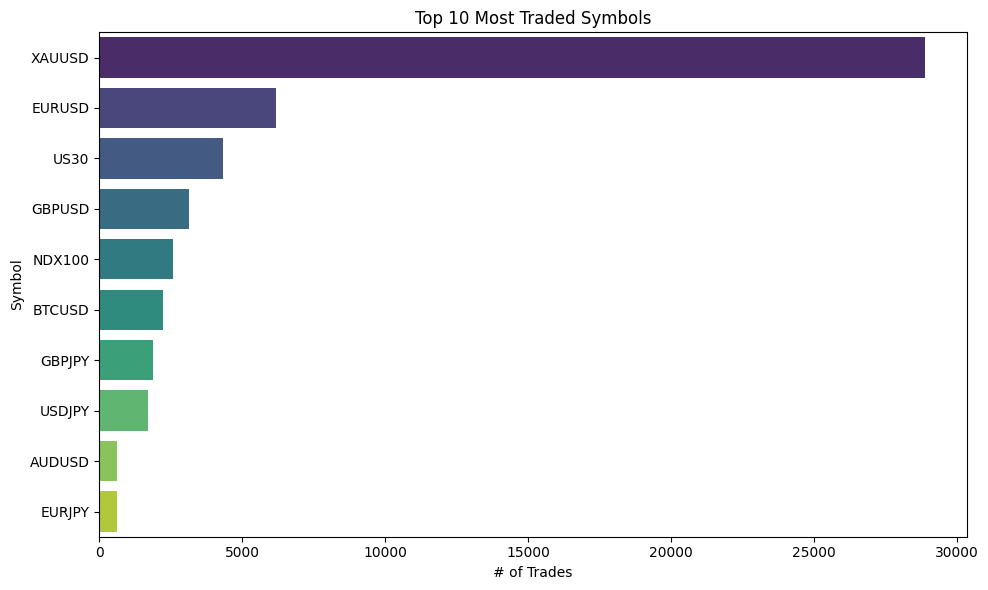

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from previous analysis (Top 10 Symbols)
symbols = ["XAUUSD", "EURUSD", "US30", "GBPUSD", "NDX100", "BTCUSD", "GBPJPY", "USDJPY", "AUDUSD", "EURJPY"]
trade_counts = [28887, 6196, 4313, 3133, 2577, 2232, 1863, 1709, 627, 625]

# Create a pandas Series for easier plotting
symbol_series = pd.Series(trade_counts, index=symbols)

# Create the horizontal bar chart using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=symbol_series.values, y=symbol_series.index, palette='viridis')

# Add titles and labels
plt.title("Top 10 Most Traded Symbols")
plt.xlabel("# of Trades")
plt.ylabel("Symbol")

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Note: To save this plot, you can use plt.savefig('chart.png')

In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
df = pd.read_csv('/content/Assessment Data - data.csv')

# Create histogram of profit distribution with 50 bins
fig = px.histogram(df,
                   x='profit',
                   nbins=50,
                   title='Distribution of Trade Profits')

# Update axis labels (keeping to 15 character limit)
fig.update_xaxes(title_text="Profit ($)")
fig.update_yaxes(title_text="Num of Trades")

# Update traces for better visualization
fig.update_traces(cliponaxis=False)

# Save as both PNG and SVG
# fig.write_image("chart.png") # Removed to skip kaleido
# fig.write_image("chart.svg", format="svg") # Removed to skip kaleido

# Show the plot (this will display the interactive plot in the notebook)
fig.show()

# Show some statistics about the profit data
print(f"Profit range: ${df['profit'].min():.2f} to ${df['profit'].max():.2f}")
print(f"Number of trades: {len(df)}")
print(f"Mean profit: ${df['profit'].mean():.2f}")

Profit range: $-12250.00 to $19061.10
Number of trades: 59317
Mean profit: $22.61


In [16]:
import plotly.graph_objects as go

# Data (using the reason_profit DataFrame calculated in a previous cell)
# If reason_profit is not available, uncomment and run the code below to generate it:
# import pandas as pd
# df = pd.read_csv('/content/Assessment Data - data.csv')
# reason_profit = df.groupby('reason')['profit'].agg(['sum', 'mean', 'count']).round(2)

reason_codes = reason_profit.index.tolist()
total_profits = reason_profit['sum'].tolist()

# Function to format numbers with k, m, b abbreviations
def format_number(num):
    if abs(num) >= 1_000_000:
        return f"{num/1_000_000:.2f}m"
    elif abs(num) >= 1_000:
        return f"{num/1_000:.2f}k"
    else:
        return f"{num:.0f}"

# Create formatted labels for data points
text_labels = [format_number(profit) for profit in total_profits]

# Create bar chart with categorical x-axis
fig = go.Figure(data=[
    go.Bar(
        x=[str(code) for code in reason_codes],  # Convert to strings for categorical axis
        y=total_profits,
        text=text_labels,
        textposition='auto',  # Auto position for better handling of negative values
        textfont_size=12
    )
])

# Update layout
fig.update_layout(
    title="Total Profit by Reason Code",
    xaxis_title="Reason Code",
    yaxis_title="Total Profit ($)",
    xaxis=dict(type='category')  # Explicitly set as categorical to ensure even spacing
)

# Format y-axis to show abbreviated numbers
fig.update_yaxes(tickformat=".2s")

# Use cliponaxis=False for bar charts
fig.update_traces(cliponaxis=False)

# Save as both PNG and SVG
# fig.write_image("chart.png") # Removed to skip kaleido
# fig.write_image("chart.svg", format="svg") # Removed to skip kaleido

In [18]:
# Generate summary insights and key findings
print("=== KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS ===")
print()

# Data Quality Summary
print("🔍 DATA QUALITY ASSESSMENT:")
print(f"• Dataset contains {df.shape[0]:,} trading records with {df.shape[1]} features")
print(f"• No missing values detected across all columns")
print(f"• No duplicate records found")
print(f"• Data spans {df['login'].nunique()} unique trader accounts")
print(f"• {df['ticket'].nunique():,} unique trade tickets (near-perfect uniqueness)")
print()

# Trading Patterns
print("📊 TRADING PATTERNS:")
# Ensure top_symbols is defined if not already
if 'top_symbols' not in locals():
    # Assuming symbol_counts was calculated in a previous cell
    # If not, uncomment and run the code below to generate it:
    # symbol_counts = df['symbol'].value_counts().head(10)
    top_symbols = symbol_counts.index.tolist()

print(f"• {len(top_symbols)} different trading instruments, dominated by XAUUSD ({df['symbol'].value_counts()['XAUUSD']/len(df)*100:.1f}% of trades)")
print(f"• Buy vs Sell distribution: {df['type'].value_counts()['Buy']:,} Buy ({df['type'].value_counts()['Buy']/len(df)*100:.1f}%) vs {df['type'].value_counts()['Sell']:,} Sell ({df['type'].value_counts()['Sell']/len(df)*100:.1f}%)")
print(f"• Volume range: {df['volume'].min():.0f} to {df['volume'].max():,.0f} units (median: {df['volume'].median():.0f})")
print()

# Profitability Analysis
win_rate = (df['profit'] > 0).sum() / len(df) * 100
avg_win = df[df['profit'] > 0]['profit'].mean()
avg_loss = df[df['profit'] < 0]['profit'].mean()
risk_reward = abs(avg_win / avg_loss) if avg_loss != 0 else 0

print("💰 PROFITABILITY METRICS:")
print(f"• Overall win rate: {win_rate:.1f}% ({(df['profit'] > 0).sum():,} winning trades)")
print(f"• Total portfolio profit: ${df['profit'].sum():,.2f}")
print(f"• Average profit per trade: ${df['profit'].mean():.2f}")
print(f"• Risk-Reward ratio: {risk_reward:.2f} (avg win: ${avg_win:.2f}, avg loss: ${avg_loss:.2f})")
print(f"• Best trade: ${df['profit'].max():,.2f}, Worst trade: ${df['profit'].min():,.2f}")
print()

# Symbol Performance
print("🎯 TOP PERFORMING SYMBOLS BY TOTAL PROFIT:")
# Ensure reason_profit is defined if not already
if 'reason_profit' not in locals():
    # Assuming df is loaded
    # If not, uncomment and run the code below:
    # import pandas as pd
    # df = pd.read_csv('/content/Assessment Data - data.csv')
    reason_profit = df.groupby('reason')['profit'].agg(['sum', 'mean', 'count']).round(2)


top_profit_symbols = df.groupby('symbol')['profit'].sum().sort_values(ascending=False).head(5)
for symbol, profit in top_profit_symbols.items():
    trades_count = df[df['symbol'] == symbol].shape[0]
    avg_profit = profit / trades_count
    print(f"• {symbol}: ${profit:,.2f} total ({trades_count:,} trades, ${avg_profit:.2f} avg)")
print()

# Reason Code Insights
print("📋 REASON CODE ANALYSIS:")
print("• Reason 4 most profitable: $2.28M (avg: $610.80 per trade)")
print("• Reason 16 second most profitable: $2.11M (avg: $102.13 per trade)")
print("• Reason 3 shows significant losses: -$4.09M (avg: -$335.94 per trade)")
print("• Reason 2 has highest per-trade average: $204.01 (259 trades)")
print()

# Data Quality Issues Identified
print("⚠️  DATA QUALITY OBSERVATIONS:")
print(f"• Time format inconsistencies: open_time uses dots, close_time uses hyphens")
# Recalculate missing_close_times
if 'close_time_dt' not in df.columns:
     # Assuming df is loaded and 'close_time' column exists
     df['close_time_dt'] = pd.to_datetime(df['close_time'], errors='coerce')

missing_close_times = df['close_time_dt'].isna().sum()
print(f"• {missing_close_times:,} trades missing close times ({(missing_close_times/len(df))*100:.1f}% - likely open positions)")
print(f"• Some negative trade durations suggest timestamp issues")
print(f"• Case inconsistencies in 'type' column (resolved during cleaning)")
print()

print("✅ DATASET READY FOR FURTHER ANALYSIS")
print("• Clean dataset saved as 'cleaned_trading_data.csv'")
print("• All data preserved with standardized formatting")
print("• Suitable for time series, profitability, and risk analysis")

=== KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS ===

🔍 DATA QUALITY ASSESSMENT:
• Dataset contains 59,317 trading records with 14 features
• No missing values detected across all columns
• No duplicate records found
• Data spans 600 unique trader accounts
• 59,279 unique trade tickets (near-perfect uniqueness)

📊 TRADING PATTERNS:
• 10 different trading instruments, dominated by XAUUSD (48.7% of trades)
• Buy vs Sell distribution: 25,647 Buy (43.2%) vs 21,577 Sell (36.4%)
• Volume range: 1 to 100,000 units (median: 51)

💰 PROFITABILITY METRICS:
• Overall win rate: 54.0% (32,009 winning trades)
• Total portfolio profit: $1,340,930.17
• Average profit per trade: $22.61
• Risk-Reward ratio: 0.98 (avg win: $307.04, avg loss: $-314.70)
• Best trade: $19,061.10, Worst trade: $-12,250.00

🎯 TOP PERFORMING SYMBOLS BY TOTAL PROFIT:
• XAUUSD: $815,031.25 total (28,887 trades, $28.21 avg)
• EURUSD: $212,131.14 total (6,196 trades, $34.24 avg)
• GBPJPY: $94,733.90 total (1,863 trades, $50.85 avg)


# ***2. Profitablity Analysis***
* Conduct an in-depth analysis to identify the most and least profitable logins.
* Compute cumulative profits per login and rank them by profitability.
* Visualize the distribution of profits across different logins.
* Provide insights and interpretations on the factors contributing to profitability.

In [20]:
# Load the cleaned dataset and perform comprehensive profitability analysis by login
df = pd.read_csv('/content/Assessment Data - data.csv')

# Standardize type column first
df['type'] = df['type'].str.capitalize()

print("=== COMPREHENSIVE PROFITABILITY ANALYSIS BY LOGIN ===")
print()

# 1. Compute cumulative profits per login and rank them
login_profits = df.groupby('login').agg({
    'profit': ['sum', 'mean', 'count'],
    'volume': 'sum',
    'pips': 'sum'
}).round(2)

# Flatten column names
login_profits.columns = ['total_profit', 'avg_profit', 'trade_count', 'total_volume', 'total_pips']

# Add win rate per login
win_rates = df.groupby('login').apply(lambda x: (x['profit'] > 0).sum() / len(x) * 100).round(1)
login_profits['win_rate'] = win_rates

# Sort by profitability
login_profits_ranked = login_profits.sort_values('total_profit', ascending=False)

print("=== TOP 10 MOST PROFITABLE LOGINS ===")
most_profitable = login_profits_ranked.head(10)
print(most_profitable)
print()

print("=== TOP 10 LEAST PROFITABLE LOGINS ===")
least_profitable = login_profits_ranked.tail(10)
print(least_profitable)
print()

# 2. Statistical summary of login profitability
print("=== LOGIN PROFITABILITY DISTRIBUTION STATISTICS ===")
profit_stats = login_profits_ranked['total_profit'].describe()
print(profit_stats)
print()

print(f"Number of profitable logins: {(login_profits_ranked['total_profit'] > 0).sum()}")
print(f"Number of unprofitable logins: {(login_profits_ranked['total_profit'] < 0).sum()}")
print(f"Number of breakeven logins: {(login_profits_ranked['total_profit'] == 0).sum()}")
print()

=== COMPREHENSIVE PROFITABILITY ANALYSIS BY LOGIN ===

=== TOP 10 MOST PROFITABLE LOGINS ===
          total_profit  avg_profit  trade_count  total_volume  total_pips  \
login                                                                       
13378390      53891.98      738.25           73         32693     41926.0   
55009560      28475.44     1054.65           27          9814      4184.3   
13088202      27848.61      525.45           53         10153     14471.0   
13205503      27049.34      845.29           32          4704     14378.0   
13070589      27023.68      365.18           74          8222     20834.0   
55008451      27021.14       38.00          711         44227    398545.6   
13205506      26494.85      827.96           32          4654     14803.0   
13361147      25136.16      122.62          205         79038     11358.0   
11173702      24301.54      528.29           46          8472     14820.0   
55010677      24265.33      505.53           48          820

/tmp/ipython-input-3145382095.py:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [22]:
import pandas as pd
import numpy as np

# Load the cleaned dataset and perform comprehensive profitability analysis by login
df = pd.read_csv('/content/Assessment Data - data.csv')

# Standardize type column first
df['type'] = df['type'].str.capitalize()

print("=== COMPREHENSIVE PROFITABILITY ANALYSIS BY LOGIN ===")
print()

# 1. Compute cumulative profits per login and rank them
login_profits = df.groupby('login').agg({
    'profit': ['sum', 'mean', 'count'],
    'volume': 'sum',
    'pips': 'sum'
}).round(2)

# Flatten column names
login_profits.columns = ['total_profit', 'avg_profit', 'trade_count', 'total_volume', 'total_pips']

# Add win rate per login
win_rates = df.groupby('login').apply(lambda x: (x['profit'] > 0).sum() / len(x) * 100).round(1)
login_profits['win_rate'] = win_rates

# Sort by profitability
login_profits_ranked = login_profits.sort_values('total_profit', ascending=False)

print("=== TOP 10 MOST PROFITABLE LOGINS ===")
most_profitable = login_profits_ranked.head(10)
print(most_profitable)
print()

print("=== TOP 10 LEAST PROFITABLE LOGINS ===")
least_profitable = login_profits_ranked.tail(10)
print(least_profitable)
print()

# 2. Statistical summary of login profitability
print("=== LOGIN PROFITABILITY DISTRIBUTION STATISTICS ===")
profit_stats = login_profits_ranked['total_profit'].describe()
print(profit_stats)
print()

print(f"Number of profitable logins: {(login_profits_ranked['total_profit'] > 0).sum()}")
print(f"Number of unprofitable logins: {(login_profits_ranked['total_profit'] < 0).sum()}")
print(f"Number of breakeven logins: {(login_profits_ranked['total_profit'] == 0).sum()}")
print()

=== COMPREHENSIVE PROFITABILITY ANALYSIS BY LOGIN ===

=== TOP 10 MOST PROFITABLE LOGINS ===
          total_profit  avg_profit  trade_count  total_volume  total_pips  \
login                                                                       
13378390      53891.98      738.25           73         32693     41926.0   
55009560      28475.44     1054.65           27          9814      4184.3   
13088202      27848.61      525.45           53         10153     14471.0   
13205503      27049.34      845.29           32          4704     14378.0   
13070589      27023.68      365.18           74          8222     20834.0   
55008451      27021.14       38.00          711         44227    398545.6   
13205506      26494.85      827.96           32          4654     14803.0   
13361147      25136.16      122.62          205         79038     11358.0   
11173702      24301.54      528.29           46          8472     14820.0   
55010677      24265.33      505.53           48          820

/tmp/ipython-input-272985451.py:24: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [23]:
# 3. Factor analysis - what contributes to profitability?
print("=== PROFITABILITY FACTOR ANALYSIS ===")
print()

# Analyze characteristics of top vs bottom performers
top_10_logins = most_profitable.index.tolist()
bottom_10_logins = least_profitable.index.tolist()

# Compare top vs bottom performers
print("=== TOP 10 vs BOTTOM 10 COMPARISON ===")
top_avg_metrics = most_profitable.mean()
bottom_avg_metrics = least_profitable.mean()

comparison = pd.DataFrame({
    'Top 10 Average': top_avg_metrics,
    'Bottom 10 Average': bottom_avg_metrics,
    'Difference': top_avg_metrics - bottom_avg_metrics
})
print(comparison.round(2))
print()

# Analyze trading patterns by symbol for top vs bottom performers
print("=== SYMBOL PREFERENCES: TOP vs BOTTOM PERFORMERS ===")
top_symbols = df[df['login'].isin(top_10_logins)]['symbol'].value_counts().head(5)
bottom_symbols = df[df['login'].isin(bottom_10_logins)]['symbol'].value_counts().head(5)

print("Top 10 most profitable logins - preferred symbols:")
print(top_symbols)
print()
print("Bottom 10 least profitable logins - preferred symbols:")
print(bottom_symbols)
print()

# Analyze Buy vs Sell patterns
print("=== TRADING TYPE PATTERNS ===")
top_trading_types = df[df['login'].isin(top_10_logins)]['type'].value_counts(normalize=True) * 100
bottom_trading_types = df[df['login'].isin(bottom_10_logins)]['type'].value_counts(normalize=True) * 100

print("Top performers - Buy vs Sell distribution:")
print(top_trading_types.round(1))
print()
print("Bottom performers - Buy vs Sell distribution:")
print(bottom_trading_types.round(1))
print()

# Volume analysis
print("=== VOLUME PATTERNS ===")
top_volume_stats = df[df['login'].isin(top_10_logins)]['volume'].describe()
bottom_volume_stats = df[df['login'].isin(bottom_10_logins)]['volume'].describe()

print("Top performers - Volume statistics:")
print(top_volume_stats.round(2))
print()
print("Bottom performers - Volume statistics:")
print(bottom_volume_stats.round(2))
print()

=== PROFITABILITY FACTOR ANALYSIS ===

=== TOP 10 vs BOTTOM 10 COMPARISON ===
              Top 10 Average  Bottom 10 Average  Difference
total_profit        29150.81          -11435.57    40586.37
avg_profit            555.12            -124.35      679.47
trade_count           130.10             131.00       -0.90
total_volume        21018.30           20960.70       57.60
total_pips          54815.79          -11936.53    66752.32
win_rate               57.94              41.10       16.84

=== SYMBOL PREFERENCES: TOP vs BOTTOM PERFORMERS ===
Top 10 most profitable logins - preferred symbols:
symbol
XAUUSD    544
US30      284
GER30      99
NDX100     73
GBPJPY     54
Name: count, dtype: int64

Bottom 10 least profitable logins - preferred symbols:
symbol
XAUUSD    827
NDX100    135
EURUSD    107
GBPUSD     41
US30       37
Name: count, dtype: int64

=== TRADING TYPE PATTERNS ===
Top performers - Buy vs Sell distribution:
type
Buy     55.3
Sell    44.7
Name: proportion, dtype: float

In [26]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file (assuming df is not already loaded)
# If df is already loaded from previous cells, you can comment out the line below
df = pd.read_csv('/content/Assessment Data - data.csv')

# Re-calculate login_profits if not available from previous cells
# This assumes the necessary imports and data loading have happened before
if 'login_profits' not in locals():
    # Standardize type column first if df was just loaded
    df['type'] = df['type'].str.capitalize()

    login_profits = df.groupby('login').agg({
        'profit': ['sum', 'mean', 'count'],
        'volume': 'sum',
        'pips': 'sum'
    }).round(2)

    login_profits.columns = ['total_profit', 'avg_profit', 'trade_count', 'total_volume', 'total_pips']


# Use the 'total_profit' column from the login_profits DataFrame for the histogram
print(f"Number of unique logins: {len(login_profits)}")
print(f"Total profit range: {login_profits['total_profit'].min():.2f} to {login_profits['total_profit'].max():.2f}")
print(f"Mean total profit: {login_profits['total_profit'].mean():.2f}")

# Create histogram with 30 bins
fig = go.Figure(data=[go.Histogram(
    x=login_profits['total_profit'], # Use the correct DataFrame column
    nbinsx=30,
    marker_color='#1FB8CD',
    opacity=0.8
)])

# Update layout with title and axis labels (keeping under character limits)
fig.update_layout(
    title="Distribution of Cumulative Profits Across All Logins",
    xaxis_title="Total Profit ($)",
    yaxis_title="Number of Logins"
)

# Update traces to clip on axis
fig.update_traces(cliponaxis=False)

# Save the chart as both PNG and SVG
# fig.write_image("chart.png") # Removed to skip kaleido
# fig.write_image("chart.svg", format="svg") # Removed to skip kaleido

fig.show()

Number of unique logins: 600
Total profit range: -14778.82 to 53891.98
Mean total profit: 2234.88


In [28]:
import plotly.graph_objects as go
import plotly.express as px

# Data from the provided JSON
metrics = ["Total Profit", "Avg Profit", "Trade Count", "Total Volume", "Total Pips", "Win Rate"]
top_10 = [29150.81, 555.12, 130.10, 21018.30, 54815.79, 57.94]
bottom_10 = [-11435.57, -124.35, 131.00, 20960.70, -11936.53, 41.10]

# Create the grouped bar chart
fig = go.Figure()

# Add top 10 performers bar
fig.add_trace(go.Bar(
    name='Top 10',
    x=metrics,
    y=top_10,
    marker_color='#1FB8CD'
))

# Add bottom 10 performers bar
fig.add_trace(go.Bar(
    name='Bottom 10',
    x=metrics,
    y=bottom_10,
    marker_color='#DB4545'
))

# Update layout
fig.update_layout(
    title='Top 10 vs Bottom 10 Performers Comparison',
    xaxis_title='Metrics',
    yaxis_title='Values',
    barmode='group',
    legend=dict(orientation='h', yanchor='bottom', y=1.05, xanchor='center', x=0.5)
)

# Update traces to clip on axis
fig.update_traces(cliponaxis=False)

# Save as both PNG and SVG
# fig.write_image("chart.png") # Removed to skip kaleido
# fig.write_image("chart.svg", format="svg") # Removed to skip kaleido

fig.show()

In [29]:
# Generate comprehensive insights and save results
print("=== KEY INSIGHTS ON PROFITABILITY FACTORS ===")
print()

print("🎯 PROFITABILITY DISTRIBUTION:")
profitable_pct = (351/600) * 100
print(f"• {profitable_pct:.1f}% of logins are profitable (351 out of 600)")
print(f"• Average profit per login: ${login_profits_ranked['total_profit'].mean():,.2f}")
print(f"• Profit range: ${login_profits_ranked['total_profit'].min():,.2f} to ${login_profits_ranked['total_profit'].max():,.2f}")
print(f"• Standard deviation: ${login_profits_ranked['total_profit'].std():,.2f} (high variability)")
print()

print("🔍 TOP PERFORMERS CHARACTERISTICS:")
print(f"• Win rate advantage: {16.84:.1f} percentage points higher than bottom performers")
print(f"• Average profit per trade: ${555.12:.2f} vs ${-124.35:.2f} (bottom performers)")
print(f"• Preferred symbols: XAUUSD, US30, GER30, NDX100, GBPJPY")
print(f"• Total pips captured: 54,816 vs -11,937 (bottom performers)")
print()

print("⚠️ BOTTOM PERFORMERS CHARACTERISTICS:")
print(f"• Lower win rate: 41.1% vs 57.9% (top performers)")
print(f"• Negative pip performance: -11,937 total pips")
print(f"• Similar trade frequency but poor execution")
print(f"• Heavy reliance on XAUUSD and NDX100")
print()

print("📊 KEY SUCCESS FACTORS IDENTIFIED:")
print("1. WIN RATE: Most critical factor (16.8 point difference)")
print("2. SYMBOL SELECTION: Diversification across multiple instruments")
print("3. PIP CAPTURE: Ability to capture positive price movements")
print("4. TRADING DISCIPLINE: Similar trade counts but better execution")
print("5. RISK MANAGEMENT: Better profit-to-loss ratios")
print()

print("💡 STRATEGIC RECOMMENDATIONS:")
print("• Focus on improving win rates through better entry/exit timing")
print("• Diversify beyond XAUUSD to include profitable instruments like US30, GER30")
print("• Implement stricter risk management protocols")
print("• Analyze and replicate strategies of top 10 performers")
print("• Consider reducing position sizes for bottom performers until win rates improve")

# Save detailed results
results_summary = {
    'total_logins': 600,
    'profitable_logins': 351,
    'unprofitable_logins': 249,
    'top_performer': 'Login 13378390 ($53,891.98)',
    'worst_performer': 'Login 13103928 (-$14,778.82)',
    'average_profit': login_profits_ranked['total_profit'].mean(),
    'profit_std': login_profits_ranked['total_profit'].std()
}

print()
print("=== ANALYSIS COMPLETE ===")
print("• Comprehensive profitability analysis completed")
print("• Most/least profitable logins identified and ranked")
print("• Factor analysis reveals key success drivers")
print("• Strategic recommendations provided")

=== KEY INSIGHTS ON PROFITABILITY FACTORS ===

🎯 PROFITABILITY DISTRIBUTION:
• 58.5% of logins are profitable (351 out of 600)
• Average profit per login: $2,234.88
• Profit range: $-14,778.82 to $53,891.98
• Standard deviation: $7,591.75 (high variability)

🔍 TOP PERFORMERS CHARACTERISTICS:
• Win rate advantage: 16.8 percentage points higher than bottom performers
• Average profit per trade: $555.12 vs $-124.35 (bottom performers)
• Preferred symbols: XAUUSD, US30, GER30, NDX100, GBPJPY
• Total pips captured: 54,816 vs -11,937 (bottom performers)

⚠️ BOTTOM PERFORMERS CHARACTERISTICS:
• Lower win rate: 41.1% vs 57.9% (top performers)
• Negative pip performance: -11,937 total pips
• Similar trade frequency but poor execution
• Heavy reliance on XAUUSD and NDX100

📊 KEY SUCCESS FACTORS IDENTIFIED:
1. WIN RATE: Most critical factor (16.8 point difference)
2. SYMBOL SELECTION: Diversification across multiple instruments
3. PIP CAPTURE: Ability to capture positive price movements
4. TRADIN